# Examen Módulo 1 - Optimización. <font color=blue>Tipo de examen 4</font>.
Lea cuidadosamente las siguientes **indicaciones** antes de comenzar el examen:
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *E1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *E1_JaramilloZuluaga*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

## Primer punto. Optimización de funciones escalares usando `sympy` (30 puntos).

**Enunciado.** Se requiere construir una caja con tapa con un volumen de $72 cm^3$. Además, lo largo de la base debe ser el doble de lo ancho. ¿Cuáles deben ser las dimensiones de modo que el área superficial de la caja sea mínima? y, ¿cuál la superfie mínima?

Ver la siguiente figura como ayuda
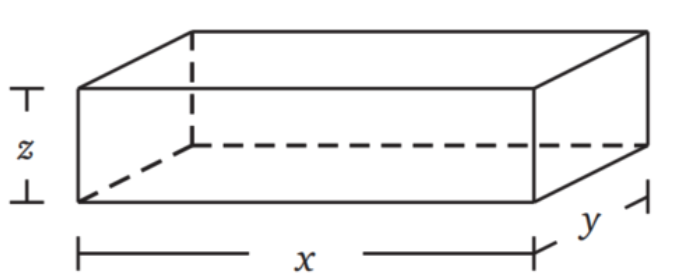

**Punto 1 (10 puntos).** Encuentre el área superficial de la caja en función de la variable $x$, $S(x)$. 

Realice este punto usando fórmulas en LaTeX, en celdas Markdown.

**Solución punto 1.**

$$V_R = xyz$$

$$ 72 = xyz$$

Por lo tanto despejando $z, x, y$

$$z = 72/xy$$ $$ x = 2y $$ $$  y =\frac{x}{2} $$ $$ z = \frac{144}{x^2} $$

Reemplazando ya simplificada

$$A_R(min) = (\frac{288}{x})+(\frac{144}{x})+ x^2$$

El dominio es 

$$\text{Dom}_{A_R(x)}= (0,\,inf]$$

**Punto 2 (15 puntos).** Usando `sympy` minimice la función $S(x)$.

**Solución punto 2.**

In [90]:
import sympy as sym

In [91]:
sym.var('x')

x

In [92]:
def AR(x):
    return 288/x + x*x + 144/x

In [93]:
dA = sym.diff(AR(x),x)
dA

2*x - 432/x**2

In [94]:
xc=sym.solve(dA,x)
xc

[6, -3 - 3*sqrt(3)*I, -3 + 3*sqrt(3)*I]

In [101]:
AR(6),AR(12)

(108.0, 180.0)

In [96]:
x = xc[0]
x

6

In [100]:
z = 72/(xc[0]*3)
z

4

La area superficial minima seria con un $$x=6$$ lo cual seria un area igual a 108

**Punto 3 (5 puntos).** ¿Cuáles son las dimensiones $x$, $y$, $z$ de la caja?

**Solución punto 3.**

Las dimensiones de la caja serian $$ x=6$$ $$ y = 3 $$ $$ z = 4 $$

El area superficial de esta caja seria igual a 108

## Segundo punto. Programación lineal (35 puntos).

**Enunciado.** Se va a organizar una planta de un taller de automóviles donde van a trabajar electricistas y
mecánicos; por necesidades de mercado, es necesario que el número de mecánicos sea igual o mayor
al número de electricistas y que el número de mecánicos no supere al doble qué el de electricistas. En
total hay disponibles $20$ electricistas y $30$ mecánicos. El beneficio de la empresa por jornada es $\$25000$ por electricista y $\$20000$ por mecánico. ¿Cuántos trabajadores de cada clase deben elegirse para
obtener el máximo beneficio?

*Definición de variables*: Sea $x_1$ número de mecánicos a elegir y $x_2$ número de electricistas a elegir.

**Punto 1 (20 puntos).** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`). Adicionalmente, si se requiere, recuerde escribir las cotas (límites superiores e inferiores) para cada una de las variables.

**Solución punto 1.**

## Funcion Utilidad Maximizar
Es no mas poner cuanto paga por mecanicos y por electricos

 $c = 25000e_1 + 20000m_2:$

Escribimos las restricciones:
Esta estuvo muy confusa ya que tenias que poner el cero en la matriz si no no te daban los calculos. Las restricciones dicen que no hay mas de 20 electricistas y 30 mecanicos disponibles ya despues por motivos de la matriz acomode los datos de la misma forma y procedi a hacer el calculo.
+ $20\leq e_1 + 0m_2:$ 
+ $30\leq 0e_1 + m_2:$  
+ $e_1\leq m_2:$
+ $m_1\leq 2e_2:$

Las igualamos a cero:
+ $20\leq e_1 + 0m_2:$ 
+ $30\leq 0e_1 + m_2:$  
+ $0\leq 1e_1  -1m_2:$
+ $0\leq 2e_2 - 1m_2:$

In [49]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [127]:
c = np.array([25000, 20000])
b = np.array([-20, -30, 0, 0])
A = np.array([[-1, 0],
              [0, -1],
              [-1, -1],
              [-2, -1]])

In [128]:
c,b,A

(array([25000, 20000]),
 array([-20, -30,   0,   0]),
 array([[-1,  0],
        [ 0, -1],
        [-1, -1],
        [-2, -1]]))

In [129]:
sol_farma = opt.linprog(c,A,b)
sol_farma

     con: array([], dtype=float64)
     fun: 1100000.0
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([ 0.,  0., 50., 70.])
  status: 0
 success: True
       x: array([20., 30.])

Tendriamos entonces que contratar 20 electricistas y 30 mecanicos para sacarle la mayor utilidad.
La funcion de utilidad evaluada $fu(20,30) = 1100000$

In [ ]:
# Escriba acá las matrices como arreglos de Numpy


**Punto 2 (15 puntos).** Resuelva el problema utilizando la función `linprog`. ¿Cuántos será la ganancia total?

In [130]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [131]:
c = np.array([25000, 20000])
b = np.array([-20, -30, 0, 0])
A = np.array([[-1, 0],
              [0, -1],
              [-1, -1],
              [-2, -1]])

In [132]:
c,b,A

(array([25000, 20000]),
 array([-20, -30,   0,   0]),
 array([[-1,  0],
        [ 0, -1],
        [-1, -1],
        [-2, -1]]))

In [133]:
sol_farma = opt.linprog(c,A,b)
sol_farma

     con: array([], dtype=float64)
     fun: 1100000.0
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([ 0.,  0., 50., 70.])
  status: 0
 success: True
       x: array([20., 30.])

Tendriamos entonces que contratar 20 electricistas y 30 mecanicos para sacarle la mayor utilidad.
La funcion de utilidad evaluada $fu(20,30) = 1100000$

## Tercer punto. Ajuste de curvas (35 puntos).

**Enunciado**. El archivo `rural_poblation.csv` contiene información histórica anual de México relativa al porcentaje de población rural desde el año 1960 hasta el año 2017. La primer columna corresponde al consecutivo, la segunda a los años y la tercera al porcentaje de población rural.

Tomado de: https://data.worldbank.org/indicator/SP.RUR.TOTL.ZS?locations=MX&view=chart

**Punto 1 (10 puntos).** Importar los datos en un DataFrame de pandas.

**Solución punto 1.**

In [42]:
import pandas as pd

In [43]:
archivo = 'rural_poblation.csv'
data = pd.read_csv(archivo)
data

,Consecutivo,Indicator Name,Rural population (% of total population)
0,1,1960,49.247
1,2,1961,48.410
2,3,1962,47.572
3,4,1963,46.735
4,5,1964,45.900
5,6,1965,45.069
6,7,1966,44.239
7,8,1967,43.413
8,9,1968,42.589
9,10,1969,41.771


**Punto 2 (15 puntos).** Usando el consecutivo como variable independiente $x$ y el porcentaje de pobalción rural como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

**Solución punto 2.**

In [44]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt


In [68]:
x = data.iloc[:,1]
y = data.iloc[:,2]
x_norm = (x-min(x))/(max(x)-min(x))
y_norm = (y-min(y))/(max(y)-min(y))

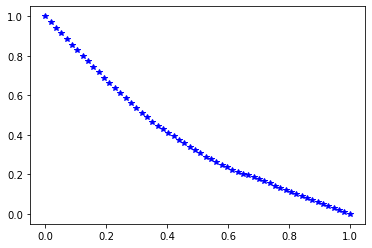

In [69]:
plt.plot(x_norm, y_norm, '*b')

In [70]:
def fun_obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    error = y-yhat
    return np.sum(error**2)

In [71]:
#Ajusta polinomio de grado 1
b01 = np.zeros(2)    #beta_inicial
ajuste1 = opt.minimize(fun_obj, b01, args=(x_norm,y_norm,1))

#Ajusta polinomio de grado 2
b02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, b02, args=(x_norm,y_norm,2))

#Ajusta polinomio de grado 3
b03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, b03, args=(x_norm,y_norm,3))

#Ajusta polinomio de grado 4
b04 = np.zeros(5)
ajuste4 = opt.minimize(fun_obj, b04, args=(x_norm,y_norm,4))

In [72]:
ajuste1

      fun: 0.20865607663702057
 hess_inv: array([[ 0.03360608, -0.04997078],
       [-0.04997078,  0.09994155]])
      jac: array([-1.86264515e-08, -3.91155481e-08])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.86987454, -0.96511052])

In [73]:
ajuste2

      fun: 0.007340059737763243
 hess_inv: array([[ 0.07013269, -0.27499439,  0.22591547],
       [-0.27499439,  1.48447818, -1.38923987],
       [ 0.22591547, -1.38923987,  1.39360312]])
      jac: array([ 2.70898454e-06, -9.35170101e-06, -3.22295818e-07])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([ 0.99497235, -1.72909836,  0.76398678])

In [74]:
ajuste3

      fun: 0.0023921613549879824
 hess_inv: array([[  0.11892551,  -0.88461351,   1.75636529,  -1.01668797],
       [ -0.88461351,   9.14317816, -20.69601176,  12.86406625],
       [  1.75636529, -20.69601176,  50.14986421, -32.5181816 ],
       [ -1.01668797,  12.86406625, -32.5181816 ,  21.69760966]])
      jac: array([-5.41622285e-08,  1.24739017e-07,  9.58389137e-08,  7.53498171e-08])
  message: 'Optimization terminated successfully.'
     nfev: 90
      nit: 16
     njev: 18
   status: 0
  success: True
        x: array([ 1.01700342, -2.00558032,  1.46126007, -0.46485806])

In [75]:
ajuste4

      fun: 0.0004535815348760127
 hess_inv: array([[ 1.71840522e-01, -2.05643384e+00,  7.19009936e+00,
        -9.57660623e+00,  4.30326719e+00],
       [-2.05643384e+00,  3.47852620e+01, -1.39030570e+02,
         1.98649220e+02, -9.31412168e+01],
       [ 7.19009936e+00, -1.39030570e+02,  5.94719586e+02,
        -8.85766543e+02,  4.27101154e+02],
       [-9.57660623e+00,  1.98649220e+02, -8.85766543e+02,
         1.35676014e+03, -6.67612033e+02],
       [ 4.30326719e+00, -9.31412168e+01,  4.27101154e+02,
        -6.67612033e+02,  3.33616521e+02]])
      jac: array([ 3.30412149e-07, -6.60373189e-07, -5.15858119e-07, -5.45638613e-07,
       -6.24502718e-07])
  message: 'Optimization terminated successfully.'
     nfev: 180
      nit: 28
     njev: 30
   status: 0
  success: True
        x: array([ 1.00240896, -1.68886841,  0.00698949,  1.81026245, -1.13756231])

In [76]:
yhat1 = ajuste1.x.dot([x_norm**i for i in range(2)])*(max(y)-min(y)) + min(y)
yhat2 = ajuste2.x.dot([x_norm**i for i in range(3)])*(max(y)-min(y)) + min(y)
yhat3 = ajuste3.x.dot([x_norm**i for i in range(4)])*(max(y)-min(y)) + min(y)
yhat4 = ajuste4.x.dot([x_norm**i for i in range(5)])*(max(y)-min(y)) + min(y)

In [77]:
import matplotlib.pyplot as plt

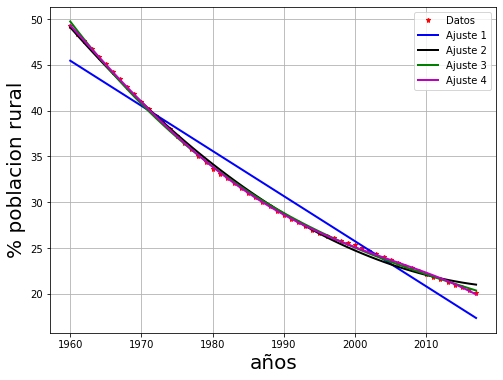

In [79]:
plt.figure(figsize=(8,6))

plt.plot(x, y, 'r*', ms=5, label='Datos')
plt.plot(x, yhat1, 'b', lw=2, label='Ajuste 1')
plt.plot(x, yhat2, 'k', lw=2, label='Ajuste 2')
plt.plot(x, yhat3, 'g', lw=2, label='Ajuste 3')
plt.plot(x, yhat4, 'm', lw=2, label='Ajuste 4')

plt.xlabel('años',fontsize=20)
plt.ylabel('% poblacion rural',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'error')

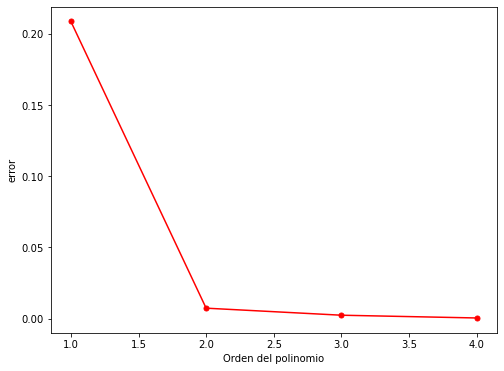

In [80]:
error = [ajuste1.fun, ajuste2.fun, ajuste3.fun, ajuste4.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,5), error, 'ro-', ms=5)
plt.xlabel('Orden del polinomio')
plt.ylabel('error')

## Conclusion
Según la gráfica anterior, el polinomio que mejor se ajusta es el de segundo orden.

**Punto 3 (10 puntos).** Con los polinomios ajustados en el punto anterior, estime la población en el año 2017 y compare con el dato real 20.133%.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

**Solución punto 3.**

In [81]:
yhat1

array([45.45852738, 44.96557601, 44.47262465, 43.97967329, 43.48672193,
       42.99377057, 42.50081921, 42.00786784, 41.51491648, 41.02196512,
       40.52901376, 40.0360624 , 39.54311104, 39.05015968, 38.55720831,
       38.06425695, 37.57130559, 37.07835423, 36.58540287, 36.09245151,
       35.59950014, 35.10654878, 34.61359742, 34.12064606, 33.6276947 ,
       33.13474334, 32.64179198, 32.14884061, 31.65588925, 31.16293789,
       30.66998653, 30.17703517, 29.68408381, 29.19113244, 28.69818108,
       28.20522972, 27.71227836, 27.219327  , 26.72637564, 26.23342428,
       25.74047291, 25.24752155, 24.75457019, 24.26161883, 23.76866747,
       23.27571611, 22.78276474, 22.28981338, 21.79686202, 21.30391066,
       20.8109593 , 20.31800794, 19.82505658, 19.33210521, 18.83915385,
       18.34620249, 17.85325113, 17.36029977])

In [85]:
yhat1[57],yhat2[57],yhat3[57], yhat4[57], y[57]

(17.360299767969995,
 21.002366259137514,
 20.36082067968872,
 19.935903356448414,
 20.133)

## Conclusion 
El polinomio que mejor estima este dato es el de grado 3 pero por la prueba del codo podemos ver que puede ser un overfitting el polinomio de tercer orden entonces mejor tomamos el segundo orden